# RDA Biplot Scaling Demonstration

This notebook demonstrates the different scaling options available in `nuee` biplots for constrained ordination (RDA/CCA).

Scaling controls how site and species scores are displayed relative to each other:
- **scaling = 1 or "sites"**: Focus on sites - distances between sites approximate their ecological distances
- **scaling = 2 or "species"**: Focus on species - angles between species vectors approximate their correlations
- **scaling = 3 or "symmetric"**: Symmetric scaling - compromise between sites and species

In [1]:
# Import required libraries
import nuee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Prepare Data

We'll use the Iris dataset and perform RDA with petal length as an environmental variable.

In [2]:
# Load iris dataset
iris_df = data.iris()
print(f"Dataset shape: {iris_df.shape}")
iris_df.head()

Dataset shape: (150, 5)


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Prepare species data (response variables)
species_data = iris_df[['sepalLength', 'sepalWidth', 'petalWidth']]

# Prepare environmental data (explanatory variable)
env_data = pd.DataFrame({
    'PetalLength': iris_df['petalLength']
})

# Store grouping variable for later
species_groups = iris_df['species']

print(f"Species data shape: {species_data.shape}")
print(f"Environmental data shape: {env_data.shape}")

Species data shape: (150, 3)
Environmental data shape: (150, 1)


## Perform Redundancy Analysis (RDA)

RDA is a constrained ordination method that relates species composition to environmental variables.

In [4]:
# Perform RDA
rda_result = nuee.rda(species_data, env_data)

# Print variance explained
if hasattr(rda_result, 'eigenvalues') and rda_result.eigenvalues is not None:
    total_var = rda_result.eigenvalues.sum()
    constrained_var = rda_result.constrained_eig.sum() if rda_result.constrained_eig is not None else 0
    
    print(f"Total variance: {total_var:.4f}")
    print(f"Constrained variance: {constrained_var:.4f}")
    print(f"Proportion explained: {constrained_var/total_var*100:.2f}%")
    print(f"\nEigenvalues: {rda_result.eigenvalues[:3]}")

Total variance: 1.4258
Constrained variance: 1.0946
Proportion explained: 76.77%

Eigenvalues: [1.09462539 0.25234686 0.07886576]


## Biplot with Different Scalings

Let's compare the three scaling options side by side.

### Scaling 1: Focus on Sites

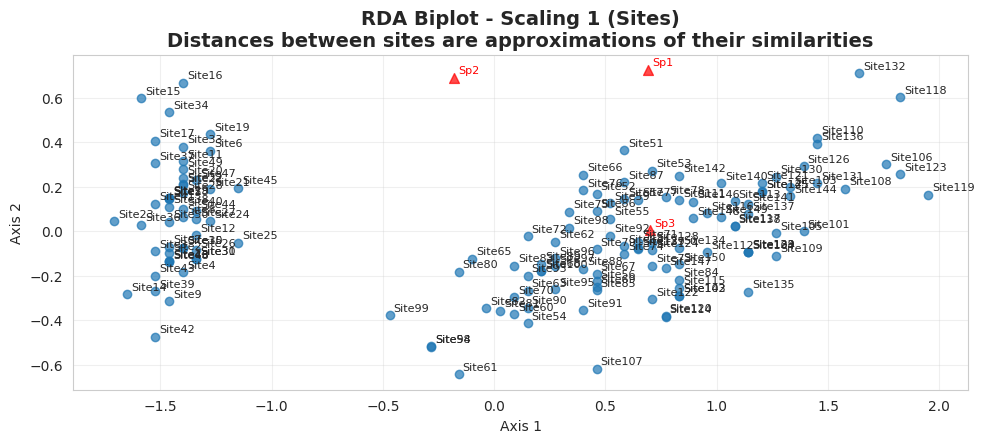

Scaling 1 (sites): Use this when you want to interpret distances between samples/sites.
Sites that are close together in the plot are ecologically similar.


In [5]:
# Scaling 1 (sites)
fig = nuee.biplot(rda_result, scaling=1, figsize=(10, 8))
plt.title('RDA Biplot - Scaling 1 (Sites)\nDistances between sites are approximations of their similarities',
          fontsize=14, fontweight='bold')
plt.show()

print("Scaling 1 (sites): Use this when you want to interpret distances between samples/sites.")
print("Sites that are close together in the plot are ecologically similar.")

### Scaling 2: Focus on Species

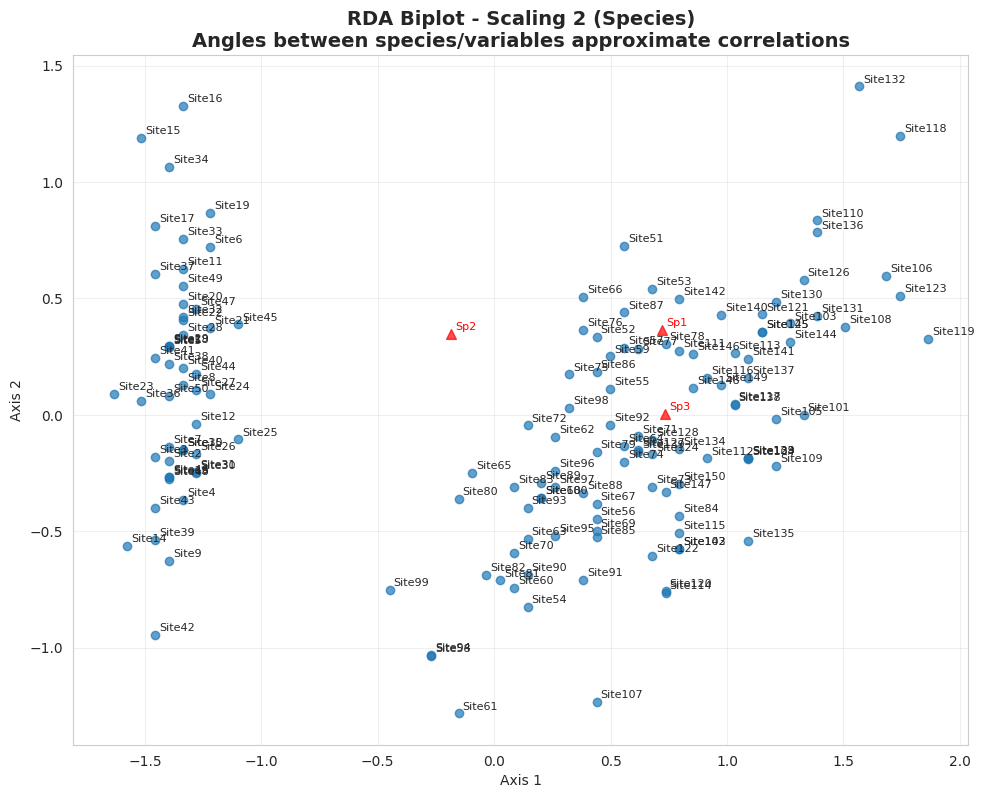

Scaling 2 (species): Use this when you want to interpret relationships between variables.
Small angles between species vectors indicate positive correlation.
Large angles (~180°) indicate negative correlation.


In [6]:
# Scaling 2 (species)
fig = nuee.biplot(rda_result, scaling=2, figsize=(10, 8))
plt.title('RDA Biplot - Scaling 2 (Species)\nAngles between species/variables approximate correlations',
          fontsize=14, fontweight='bold')
plt.show()

print("Scaling 2 (species): Use this when you want to interpret relationships between variables.")
print("Small angles between species vectors indicate positive correlation.")
print("Large angles (~180°) indicate negative correlation.")

### Scaling 3: Symmetric

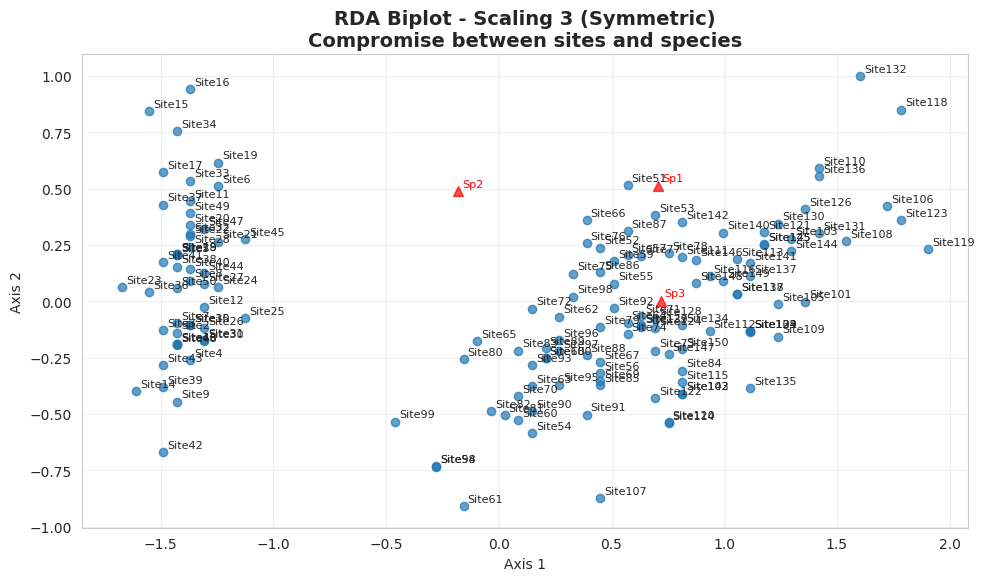

Scaling 3 (symmetric): Use this for a balanced view of both sites and species.
This is a compromise that doesn't strongly favor either interpretation.


In [7]:
# Scaling 3 (symmetric)
fig = nuee.biplot(rda_result, scaling=3, figsize=(10, 8))
plt.title('RDA Biplot - Scaling 3 (Symmetric)\nCompromise between sites and species',
          fontsize=14, fontweight='bold')
plt.show()

print("Scaling 3 (symmetric): Use this for a balanced view of both sites and species.")
print("This is a compromise that doesn't strongly favor either interpretation.")

## Side-by-Side Comparison

Let's plot all three scalings together for direct comparison.

See the three separate plots above for comparison.

Key differences:
- Scaling 1: Sites are spread out, species vectors are compressed
- Scaling 2: Species vectors are spread out, sites are compressed
- Scaling 3: Both sites and species have intermediate spread


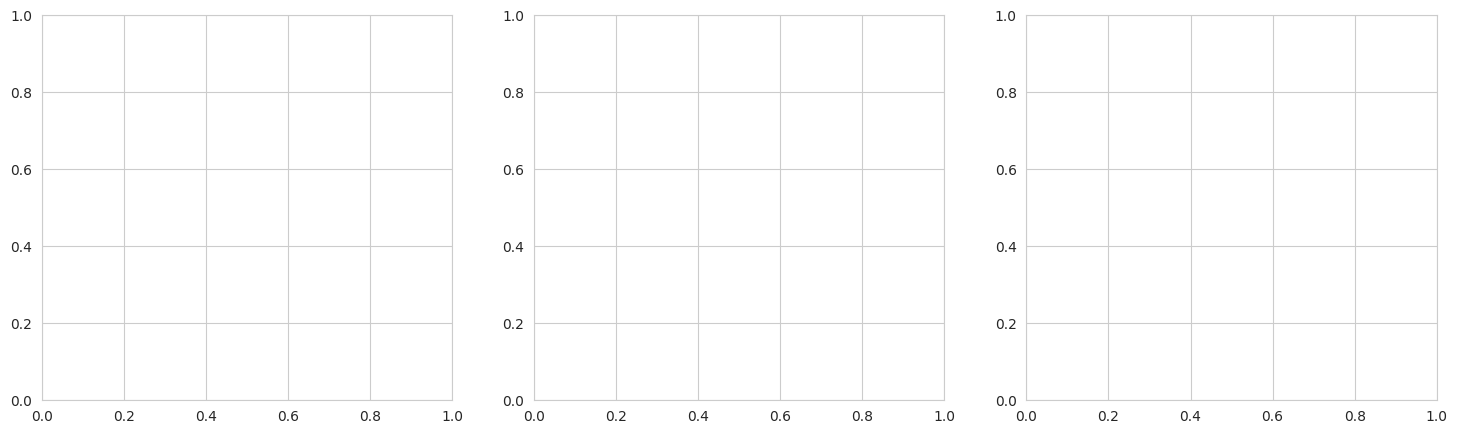

In [8]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scaling_names = ['Sites (1)', 'Species (2)', 'Symmetric (3)']
scaling_values = [1, 2, 3]

for idx, (ax, name, scaling) in enumerate(zip(axes, scaling_names, scaling_values)):
    # We need to manually create the plots since biplot creates its own figure
    # For now, let's create separate figures
    pass

# Note: Due to the current implementation, we'll show them separately above
# A more advanced implementation would allow passing an axes object to biplot()
print("See the three separate plots above for comparison.")
print("\nKey differences:")
print("- Scaling 1: Sites are spread out, species vectors are compressed")
print("- Scaling 2: Species vectors are spread out, sites are compressed")
print("- Scaling 3: Both sites and species have intermediate spread")

## Interpretation Guide

### When to use each scaling:

**Scaling 1 (Sites)**:
- When your main interest is in comparing sites/samples
- When you want to identify which sites are similar
- When you want to see how environmental variables relate to site positions
- Default in many ecology applications

**Scaling 2 (Species)**:
- When your main interest is in species relationships
- When you want to understand species-environment correlations
- When you want to see which species co-occur
- Useful for understanding community assembly

**Scaling 3 (Symmetric)**:
- When you want a balanced view of both sites and species
- For exploratory analysis
- When presenting to audiences unfamiliar with the scaling concept

### Reading the biplot:

1. **Environmental arrows (blue)**: 
   - Point in the direction of maximum change for that variable
   - Length indicates strength of relationship
   - Sites in the direction of the arrow have high values for that variable

2. **Species vectors (red triangles)**:
   - Show where each response variable has its maximum
   - Angles between species indicate correlations (in scaling 2)

3. **Site points (blue dots)**:
   - Show the position of each sample in ordination space
   - Distances between sites are meaningful (in scaling 1)

## Summary

This notebook demonstrated:
1. How to perform RDA with `nuee`
2. The three different scaling options for biplots
3. How to interpret each scaling type
4. When to use each scaling

The choice of scaling depends on your research question:
- Use **scaling 1** for site-focused analyses
- Use **scaling 2** for species-focused analyses  
- Use **scaling 3** for a balanced overview

Remember: the underlying ordination is the same - only the visualization changes!